<a href="https://colab.research.google.com/github/prajeshatm/hello/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim:** Program to implement decision trees using any standard dataset available in the public domain and find the accuracy of the algorithm.

**Short notes**

Decision tree is a type of supervised learning algorithm (having a predefined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables.

**Used Python Packages**:

sklearn :
In python, sklearn is a machine learning package which include a lot of ML algorithms. Here, we are using some of its modules like train_test_split, DecisionTreeClassifier and accuracy_score.

NumPy :
It is a numeric python module which provides fast maths functions for calculations.
It is used to read data in numpy arrays and for manipulation purpose.

Pandas :
Used to read and write different files.
Data manipulation can be done easily with dataframes.

**Important Terminology related to Tree based Algorithms**

**Root Node**: It represents entire population or sample and this further gets divided into two or more homogeneous sets.

**Splitting**: It is a process of dividing a node into two or more sub-nodes.

**Decision Node**: When a sub-node splits into further sub-nodes, then it is called decision node.

**Leaf/ Terminal Node**: Nodes do not split is called Leaf or Terminal node.

**Pruning**: When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting.

**Branch / Sub-Tree**: A sub section of entire tree is called branch or sub-tree.

**Parent and Child Node**: A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

#load iris data
data = load_iris()

In [ ]:
print('classes to predict: ',data.target_names)
print('Features: ',data.feature_names)

classes to predict:  ['setosa' 'versicolor' 'virginica']
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
X = data.data
y = data.target

display (X.shape, y.shape)

(150, 4)

(150,)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 50, test_size = 0.25)

In [ ]:
#default criterion is Gini
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy on train data using Gini: ',accuracy_score(y_train, y_pred = classifier.predict(X_train)))
print('Accuracy on test data using Gini: ',accuracy_score(y_test,y_pred))


Accuracy on train data using Gini:  1.0
Accuracy on test data using Gini:  0.9473684210526315


In [ ]:
#change criterion to entropy
classifier_entropy = DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit(X_train, y_train)
y_pred_entropy = classifier_entropy.predict(X_test)
print('Accuracy on train data using entropy', accuracy_score(y_train, y_pred = classifier_entropy.predict(X_train)))
print('Accuracy on test data using entropy', accuracy_score(y_test,y_pred_entropy))

Accuracy on train data using entropy 1.0
Accuracy on test data using entropy 0.9473684210526315


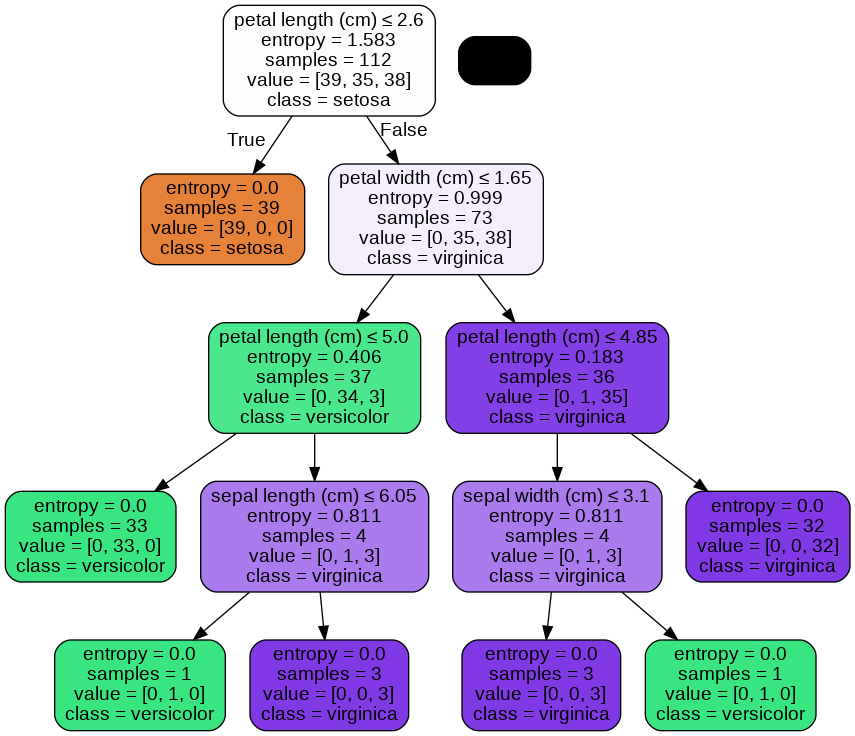

In [ ]:
#visualise the decision tree

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
#the students can try using classifier, classifier_entropy and classifier_entropy1
#as first parameter below.
export_graphviz(classifier_entropy, out_file = dot_data,filled = True, rounded = True,special_characters = True, feature_names = data.feature_names, class_names = data.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())